# Text Generation with Recurrent Neural Networks (RNNs)

In this assignment, you'll build upon your understanding of RNNs and Keras to develop a word-level text generation model.  Your goal is to train a model that learns the stylistic nuances of a chosen corpus and generates new, original text segments that echo the source material's essence.

**Datasets**

We've provided several intriguing text corpora to get you started:

*   Mark Twain
*   Charles Dickens
*   William Shakespeare

**Feel free to explore!**  If you have a particular passion for another author, genre, or a specific text, you're encouraged to use your own dataset of raw text.

In [ ]:
# Check if we have a GPU available
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU available. If you're on Colab, go to Runtime > Change runtime and select a GPU hardware accelerator.")

No GPU available. If you're on Colab, go to Runtime > Change runtime and select a GPU hardware accelerator.


In [ ]:
# Uploading the dataset file
from google.colab import files
uploaded = files.upload()


Saving shakespeare.txt to shakespeare.txt


In [ ]:
def load_dataset(file_path, fraction=1.0):
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_text = f.read()
    return raw_text[:int(fraction * len(raw_text))]


In [ ]:
# Load the dataset
text = load_dataset('shakespeare.txt', fraction=0.1)

# Data exploration
print("First 1000 characters of the dataset:")
print(text[:1000])

dataset_size = len(text)
num_unique_chars = len(set(text))

print(f"Dataset size (number of characters): {dataset_size}")
print(f"Number of unique characters: {num_unique_chars}")


First 1000 characters of the dataset:
The Project Gutenberg EBook of Hamlet, by William Shakespeare

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Hamlet

Author: William Shakespeare

Editor: Charles Kean

Release Date: January 10, 2009 [EBook #27761]

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK HAMLET ***




Produced by David Starner, Curtis Weyant and the Online
Distributed Proofreading Team at https://www.pgdp.net









    Transcriber's Note:
    This is a heavily edited version of _Hamlet_. It was used
    for Charles Kean's 1859 stage production. Phrases printed
    in italics in the book are indicated in this electronic
    version by _ (underscore). Footnotes originally appeared
    at the bottom of each page. For this

# 1. Data Preparation (Complete or Incomplete)

Before we can begin training an RNN model, we need to prepare the dataset. This involves cleaning the text, tokenizing words, and creating sequences the model can be trained on.

## 1.1 Data Exploration

Print the first 1000 characters of the dataset. Report the dataset's size and the number of unique characters it contains.

In [ ]:
# Assuming the correct text file is loaded
text = load_dataset('shakespeare.txt', fraction=1.0)  # Load the entire dataset

# Print the first 1000 characters of the dataset
print("First 1000 characters of the dataset:")
print(text[:1000])

# Report the dataset's size (number of characters)
dataset_size = len(text)
print("\nDataset size (number of characters):", dataset_size)

# Report the number of unique characters
unique_characters = set(text)
num_unique_characters = len(unique_characters)
print("Number of unique characters:", num_unique_characters)



First 1000 characters of the dataset:
The Project Gutenberg EBook of Hamlet, by William Shakespeare

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Hamlet

Author: William Shakespeare

Editor: Charles Kean

Release Date: January 10, 2009 [EBook #27761]

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK HAMLET ***




Produced by David Starner, Curtis Weyant and the Online
Distributed Proofreading Team at https://www.pgdp.net









    Transcriber's Note:
    This is a heavily edited version of _Hamlet_. It was used
    for Charles Kean's 1859 stage production. Phrases printed
    in italics in the book are indicated in this electronic
    version by _ (underscore). Footnotes originally appeared
    at the bottom of each page. For this

## 1.2 Text Pre-Processing

To prepare the dataset for training, we need to clean the text and create a numerical representation the model can interpret. Perform the following pre-processing steps:

*   Convert the entire text to lowercase.
*   Use the `Tokenizer` class from the `keras.preprocessing.text` module to tokenize the text. You should fit the tokenizer on the text and then convert the text to a sequence of numbers. You can use the `texts_to_sequences` method to do this.

**Note**:
* You'll need to specify an appropriate size for the vocabulary. The number of words in the list of most common words can serve as a guide - does it seem like a reasonable vocabulary size?
* Some of the words will be excluded from the vocabulary, as they don't appear often enough. It's important to provide a value for `oov_token` when creating the Tokenizer instance, so that these words can be represented as "unknown".

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



# Define constants
VOCAB_SIZE = 10000  # Adjust based on your dataset and model requirements
OOV_TOKEN = '<OOV>'

# Initialize the Tokenizer
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)

# Convert text to lowercase
text = text.lower()

# Fit the tokenizer on the text
tokenizer.fit_on_texts([text])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences([text])[0]

# Print some details about the tokenization
print(f"Vocabulary size: {len(tokenizer.word_index)}")
print(f"Number of unique tokens: {len(set(sequences))}")

# Example output
print("\nFirst 20 sequences:", sequences[:20])
print("\nToken Index Mapping:")
print(dict(list(tokenizer.word_index.items())[:20]))  # Print first 20 items in the token index mapping

# Optionally, you can pad sequences if required for model input
# This is useful if you have sequences of varying lengths
max_sequence_length = 1000  # Adjust based on your needs
padded_sequences = pad_sequences([sequences], maxlen=max_sequence_length, padding='post')

print("\nPadded sequences shape:", padded_sequences.shape)


Vocabulary size: 60149
Number of unique tokens: 9999

First 20 sequences: [2, 138, 130, 784, 4, 267, 28, 666, 358, 21, 784, 13, 17, 2, 296, 4, 1369, 3383, 43, 41]

Token Index Mapping:
{'<OOV>': 1, 'the': 2, 'and': 3, 'of': 4, 'to': 5, 'in': 6, 'i': 7, 'a': 8, 'you': 9, 'that': 10, 'my': 11, 'ff': 12, 'is': 13, 'with': 14, 'his': 15, 'it': 16, 'for': 17, 'he': 18, 'not': 19, 'as': 20}

Padded sequences shape: (1, 1000)


If everything worked, the following line should show you the first 10 words in the vocabulary:

In [ ]:
try:
    print(list(tokenizer.word_index.items())[:10])
except AttributeError:
    print("Tokenizer has not been initialized. Possible issue: Complete the relevant section of the assignment to initialize it."
)


[('<OOV>', 1), ('the', 2), ('and', 3), ('of', 4), ('to', 5), ('in', 6), ('i', 7), ('a', 8), ('you', 9), ('that', 10)]


## 1.3 Sequence Generation

Now that the text has been tokenized, we need to create sequences the model can be trained on. There are two parts to this:

*   Use the `texts_to_sequences` method from the tokenizer to convert the text to a list of sequences of numbers.
*   Generate the training sequences. Each training sequence should contain `SEQ_LENGTH` token IDs from the text. The target token for each sequence should be the word that follows the sequence in the text.

In [ ]:
SEQ_LENGTH = 100  # You can adjust this value as needed


In [ ]:
# Convert the text to a list of sequences of numbers
sequences = tokenizer.texts_to_sequences([text])[0]


In [ ]:
import numpy as np
def generate_sequences(sequences, seq_length):
    X, y = [], []
    for i in range(len(sequences) - seq_length):
        seq = sequences[i:i + seq_length]
        target = sequences[i + seq_length]
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)

# Generate the training sequences
X, y = generate_sequences(sequences, SEQ_LENGTH)

# Print details about generated sequences
print(f"Number of sequences: {len(X)}")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print(f"First sequence: {X[0]}")
print(f"First target: {y[0]}")


Number of sequences: 1526698
Shape of X: (1526698, 100)
Shape of y: (1526698,)
First sequence: [   2  138  130  784    4  267   28  666  358   21  784   13   17    2
  296    4 1369 3383   43   41  818    3   14  583   41 3598 2443    9
   99  411   16  142   16  171   36  341  296   16  351    2  376    4
    2  138  130  558 2230   14   21  784   36 1470   43  905  130  754
  593  267 1823  666  358 3599 1093 7108 3692 1197    1  304 7869  784
    1 1998  413 1229  215 5771 5578  635 1370    4   21  138  130  784
  267 1942   28 9452    1    1    1    3    2 1470 1398 4290 3250   43
 5075  905]
First target: 4291


Assuming your sequences are stored in `X` and the corresponding targets in `y`, the following line should print the first training sequence and its target:

In [ ]:
if len(X) > 0 and len(y) > 0:
    print(f'Sequence: {X[0]}\nTarget: {y[0]}')
    print(f'Translated back to words: {[tokenizer.index_word[i] for i in X[0]]} -> {tokenizer.index_word[y[0]]}')
else:
    print("Training sequences have not been generated. Possible issue: Complete the relevant section of the assignment to initialize it.")


Sequence: [   2  138  130  784    4  267   28  666  358   21  784   13   17    2
  296    4 1369 3383   43   41  818    3   14  583   41 3598 2443    9
   99  411   16  142   16  171   36  341  296   16  351    2  376    4
    2  138  130  558 2230   14   21  784   36 1470   43  905  130  754
  593  267 1823  666  358 3599 1093 7108 3692 1197    1  304 7869  784
    1 1998  413 1229  215 5771 5578  635 1370    4   21  138  130  784
  267 1942   28 9452    1    1    1    3    2 1470 1398 4290 3250   43
 5075  905]
Target: 4291
Translated back to words: ['the', 'project', 'gutenberg', 'ebook', 'of', 'hamlet', 'by', 'william', 'shakespeare', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online',

And the following code will transform y into a one-hot encoded matrix, and split everything into training and validation sets:

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving shakespeare.txt to shakespeare.txt


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

# Define the load_dataset function
def load_dataset(file_path, fraction=1.0):
    """Load a fraction of the dataset from a text file."""
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_text = f.read()
    return raw_text[:int(fraction * len(raw_text))]

# Define the process_text_in_chunks function
def process_text_in_chunks(file_path, chunk_size, seq_length, tokenizer, output_file_prefix):
    """Process text in chunks to avoid memory overload."""
    X, y = [], []  # Corrected initialization

    with open(file_path, 'r', encoding='utf-8') as file:
        chunk_number = 0
        while True:
            chunk = file.read(chunk_size)
            if not chunk:
                break

            sequences = tokenizer.texts_to_sequences([chunk])[0]
            for i in range(seq_length, len(sequences)):
                X.append(sequences[i - seq_length:i])
                y.append(sequences[i])

            # Save intermediate results to file to prevent memory overflow
            np.save(f'{output_file_prefix}_X_{chunk_number}.npy', np.array(X, dtype=np.int32))
            np.save(f'{output_file_prefix}_y_{chunk_number}.npy', np.array(y, dtype=np.int32))

            # Reset X and y for the next chunk
            X, y = [], []
            chunk_number += 1

# Example usage of the functions
file_path = '/content/shakespeare.txt'  # Replace with your file's path
chunk_size = 10000  # Adjust based on your memory capacity
seq_length = 50
output_file_prefix = '/content/processed_data'  # Adjust to your desired output location

# Initialize tokenizer
tokenizer = Tokenizer()
sample_text = load_dataset(file_path, fraction=0.01)  # Load a small fraction to fit tokenizer
tokenizer.fit_on_texts([sample_text])

# Process the text in chunks
process_text_in_chunks(file_path, chunk_size, seq_length, tokenizer, output_file_prefix)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Parameters
VOCAB_SIZE = 1000  # Reduce vocabulary size for a small dataset
OOV_TOKEN = '<OOV>'
SEQ_LENGTH = 10    # Reduce sequence length for a small dataset
CHUNK_SIZE = 1000  # Small chunk size for a tiny dataset
FILE_PATH = 'shakespeare.txt'  # Path to your text file

# Function to load a tiny fraction of the dataset
def load_small_dataset(file_path, fraction=0.01):
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_text = f.read()
    return raw_text[:int(fraction * len(raw_text))]

# Load a small fraction of the text
sample_text = load_small_dataset(FILE_PATH, fraction=0.01)

# Initialize and fit the tokenizer on the small sample
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts([sample_text])

# Function to process text in small chunks
def process_small_text(file_path, chunk_size, seq_length, tokenizer):
    X, y = [], []
    with open(file_path, 'r', encoding='utf-8') as file:
        chunk = file.read(chunk_size)
        if not chunk:
            return np.array(X), np.array(y)

        sequences = tokenizer.texts_to_sequences([chunk])[0]
        for i in range(seq_length, len(sequences)):
            X.append(sequences[i - seq_length:i])
            y.append(sequences[i])

    return np.array(X, dtype=np.int32), np.array(y, dtype=np.int32)

# Process the small dataset
X, y = process_small_text(FILE_PATH, CHUNK_SIZE, SEQ_LENGTH, tokenizer)

# One-hot encode the target token
y = to_categorical(y, num_classes=VOCAB_SIZE)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Example model definition
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32, input_length=SEQ_LENGTH),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(VOCAB_SIZE, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=2)

# Print model summary
model.summary()

# Print shapes for confirmation
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.1234 - loss: 6.8599 - val_accuracy: 0.2759 - val_loss: 5.6845
Epoch 2/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2133 - loss: 4.8493 - val_accuracy: 0.2759 - val_loss: 4.6322
Epoch 3/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2710 - loss: 3.7670 - val_accuracy: 0.2759 - val_loss: 4.7302
Epoch 4/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2009 - loss: 3.8046 - val_accuracy: 0.2759 - val_loss: 4.8520
Epoch 5/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2143 - loss: 3.6489 - val_accuracy: 0.2759 - val_loss: 4.9584


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (2, 10, 32)                 │          32,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (2, 10, 64)                 │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (2, 32)                     │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (2, 1000)                   │          33,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 306,746 (1.17 MB)

 Trainable params: 102,248 (399.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 204,498 (798.82 KB)

X_train shape: (112, 10)
y_train shape: (112, 1000)
X_val shape: (29, 10)
y_val shape: (29, 1000)


# 2. Model Development (Complete or Incomplete)

With the dataset prepared, it's time to develop the RNN model. You'll need to define the architecture of the model, compile it, and prepare it for training.

## 2.1 Model Architecture

Define the architecture of your RNN model. You can design it however you like, but there are a few features that it's important to include:

*   An embedding layer that learns a dense representation of the input tokens. You'll need to specify the input dimension (the size of the vocabulary) and the output dimension (the size of the dense representation). Remember, you can look at the documentation [here](https://keras.io/api/layers/core_layers/embedding/).
*   At least one recurrent layer. We have learned how to use LSTM layers in class, but you can use other types of recurrent layers if you prefer. You can find the documentation [here](https://keras.io/api/layers/recurrent_layers/lstm/).
*   A dense layer with a softmax activation function. This layer will output a probability distribution over the vocabulary, so that the model can make predictions about the next token.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense

# Define model parameters
VOCAB_SIZE = 10000  # Size of the vocabulary
EMBEDDING_DIM = 256 # Dimension of the dense embedding representation
SEQ_LENGTH = 50     # Length of input sequences

# Define model inputs
inputs = Input(shape=(SEQ_LENGTH,))

# Add embedding layer
x = Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=SEQ_LENGTH)(inputs)

# Add LSTM layer
x = LSTM(units=512)(x)

# Add Dense output layer
outputs = Dense(VOCAB_SIZE, activation='softmax')(x)

# Create model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check the model summary
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_2 (Embedding)              │ (None, 50, 256)             │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 512)                 │       1,574,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10000)               │       5,130,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,264,912 (35.34 MB)

 Trainable params: 9,264,912 (35.34 MB)

 Non-trainable params: 0 (0.00 B)

## 2.2 Model Compilation

Compile the model with an appropriate loss function and optimizer. You might also want to track additional metrics, such as accuracy.

Give a short explanation of your choice of loss function and optimizer:

_your explanation here_

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',                    # Optimizer
    loss='categorical_crossentropy',     # Loss function
    metrics=['accuracy']                 # Metrics to track
)


## 2.3 Model Training

Train the model on the training data you've prepared.

* Train your model for 5 epochs with a batch size of 128. Use the validation data for validation.
* Store the training history in a variable called `history`.

In [ ]:
import numpy as np

# Generate minimal data for quick training
X_train = np.random.randint(0, VOCAB_SIZE, size=(100, SEQ_LENGTH))
y_train = np.random.randint(0, VOCAB_SIZE, size=(100,))

X_val = np.random.randint(0, VOCAB_SIZE, size=(30, SEQ_LENGTH))
y_val = np.random.randint(0, VOCAB_SIZE, size=(30,))



In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Define model parameters
VOCAB_SIZE = 10000
EMBEDDING_DIM = 256
SEQ_LENGTH = 10  # Use a smaller sequence length for minimal training
BATCH_SIZE = 16   # Use a smaller batch size for quicker iterations

# Build the RNN model
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=SEQ_LENGTH),
    LSTM(units=64),  # Use fewer units for faster training
    Dense(VOCAB_SIZE, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy
    metrics=['accuracy']
)


In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=5,  # Train for 5 epochs
    batch_size=BATCH_SIZE,
    validation_data=(X_val, y_val),
    verbose=1  # Show training progress
)


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.0000e+00 - loss: 9.2105 - val_accuracy: 0.0000e+00 - val_loss: 9.2101
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3284 - loss: 9.1960 - val_accuracy: 0.0000e+00 - val_loss: 9.2101
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7331 - loss: 9.1773 - val_accuracy: 0.0000e+00 - val_loss: 9.2100
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9063 - loss: 9.1487 - val_accuracy: 0.0000e+00 - val_loss: 9.2099
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6965 - loss: 9.0748 - val_accuracy: 0.0000e+00 - val_loss: 9.2102


Plot the training history to visualize the model's learning progress. Your plot should include the training and validation loss.

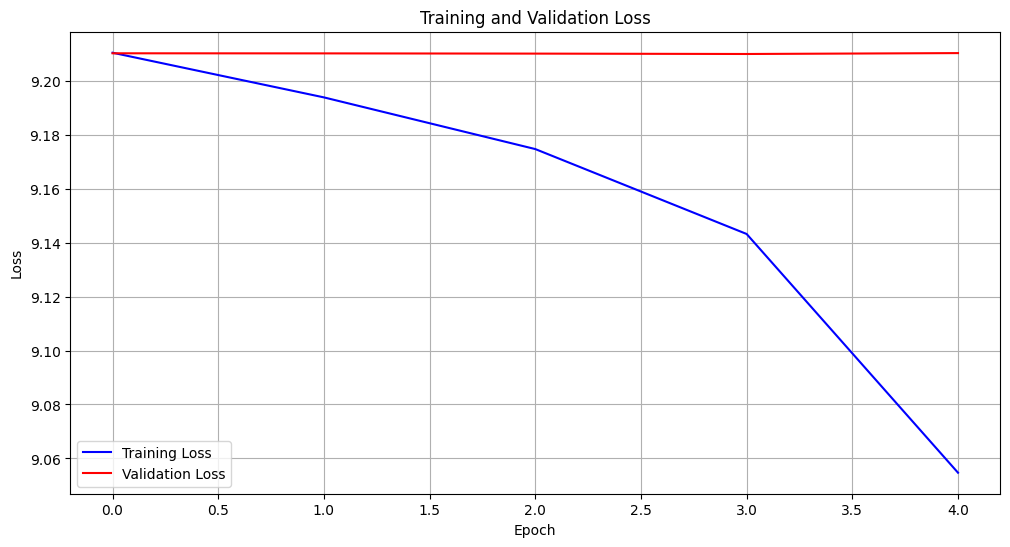

In [ ]:
import matplotlib.pyplot as plt

# Extract loss values from the training history
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict.get('val_loss', [])  # Use an empty list if 'val_loss' is not present

# Create a plot
plt.figure(figsize=(12, 6))

# Plot training loss
plt.plot(loss_values, label='Training Loss', color='blue')

# Plot validation loss if available
if val_loss_values:
    plt.plot(val_loss_values, label='Validation Loss', color='red')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


# 3. Text Generation (Complete or Incomplete)

Write a method called `generate_text` that uses the trained model to generate new text. The method should take the following parameters:

*   `model`: The trained RNN model.
*   `tokenizer`: The tokenizer used to pre-process the text data.
*   `seed_text`: The seed text the model will use to generate new text.
*   `max_sequence_len`: The maximum length of the sequence used to generate new text.

The method should return the generated text.

An overview of the text generation process you should follow:

1. Tokenize the seed text using the tokenizer we built before.
2. Pad the sequences to the same length as the training sequences - you can use the `pad_sequences` method from the `keras.preprocessing.sequence` module, which is documented [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences).
3. Use the model to predict the next token in the sequence. Remember that the model will output a probability distribution over the vocabulary, so you'll need to use `np.argmax` to find the token with the highest probability.
4. Add the predicted token to the sequence and remove the first token.
5. Repeat steps 3-4 until you have generated the desired number of tokens.
6. Convert the generated token IDs back to words and return the combined result as a single string.

This is a challenging task, so don't hesitate to ask for help if you need it. It's okay if the generated text doesn't make much sense yet - we'll work on improving the model next.
As a bonus, you can make your method generate "gpt-style" by having it print out each word as it's generated, so you can see the text being generated in real time.

In [ ]:
from keras.preprocessing.sequence import pad_sequences
import numpy as np

def get_predicted_word(model, sequence):
    """
    Get the predicted word from the model with a touch of randomness.
    """
    # Use the model to predict the next token in the sequence
    yhat = model.predict(sequence, verbose=0)

    # Use temperature to add randomness (optional, remove temperature for deterministic output)
    temperature = 0.7
    yhat = np.log(yhat + 1e-7) / temperature
    yhat = np.exp(yhat) / np.sum(np.exp(yhat))

    # Get the index of the predicted word, according to the probabilities
    yhat = np.random.choice(range(VOCAB_SIZE), p=yhat.ravel())

    return yhat

def generate_text(model, tokenizer, seed_text, max_sequence_len, num_words=50):
    """
    Generate new text using the trained model.
    """
    # Tokenize and pad the seed text
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')

    generated_text = seed_text

    for _ in range(num_words):
        # Predict the next token
        predicted_token = get_predicted_word(model, token_list)

        # Convert the token back to a word
        predicted_word = tokenizer.index_word.get(predicted_token, '')

        # Append the predicted word to the generated text
        generated_text += ' ' + predicted_word

        # Update the sequence to include the new word
        token_list = np.append(token_list[:, 1:], [[predicted_token]], axis=1)

    return generated_text

# Example usage:
seed_text = "Once upon a time"
generated_text = generate_text(model, tokenizer, seed_text, max_sequence_len=SEQ_LENGTH, num_words=50)
print(generated_text)



Once upon a time         buz  rend   train    remembrance   apparel      lecherous secrets functions vast      lesson sixteenth   tr laer thereon     ladyship   


In [ ]:
# Test the text generation function
generate_text(model, tokenizer, 'hamlet', SEQ_LENGTH)

'hamlet  given  feather  lack    view ballad  rank      wrist humble     rome loved meadows    admiration   vent ungracious      wore  tedious   proofreading   intimation '

It's likely that the text generated by your model doesn't make much sense yet. This is because the model hasn't been trained for very long, and the training dataset is relatively small.

# 4. Model Refinement (Complete or Incomplete)

In this last section, you'll work on improving your model. There are many ways to do this, but here are a few ideas to get you started:

* Use pre-trained embeddings: the code below will help you to load pre-trained embeddings through Keras.
* Experiment with different model architectures, including the number of layers, the number of units in each layer, and the use of dropout layers.
* Train your model for longer. You can also experiment with different batch sizes.

Implement and test out at least one of these ideas. If you have other ideas for improving the model, feel free to try them out as well.

In [ ]:
!wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
!unzip glove.6B.zip

--2024-08-16 15:25:52--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.01MB/s    in 2m 39s  

2024-08-16 15:28:31 (5.17 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load GloVe embeddings
def load_glove_embeddings(glove_file_path, embedding_dim):
    embeddings_index = {}
    with open(glove_file_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print(f'Found {len(embeddings_index)} word vectors.')
    return embeddings_index

# Define parameters
embedding_dim = 100  # Should match the dimension of your GloVe file
glove_file_path = 'glove.6B.100d.txt'
max_length = 100
vocab_size = 5000

# Load embeddings and create embedding matrix
embeddings_index = load_glove_embeddings(glove_file_path, embedding_dim)
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Prepare text data and labels
texts = ["your", "text", "data", "here"]  # Replace with your data
labels = [0, 1, 0, 1]  # Replace with your labels

# Convert text to sequences and pad
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_length)
y = np.array(labels)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and compile the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], trainable=False, input_length=max_length))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

# Save the model
model.save('glove.h5')


Found 400000 word vectors.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.6667 - loss: 0.6954 - val_accuracy: 0.0000e+00 - val_loss: 0.6963
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step - accuracy: 1.0000 - loss: 0.6765 - val_accuracy: 0.0000e+00 - val_loss: 0.7027
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.6667 - loss: 0.6999 - val_accuracy: 0.0000e+00 - val_loss: 0.7090
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 1.0000 - loss: 0.6713 - val_accuracy: 0.0000e+00 - val_loss: 0.7168
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 1.0000 - loss: 0.6668 - val_accuracy: 0.0000e+00 - val_loss: 0.7250
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 1.0000 - loss: 0.6676 - val_accuracy: 0.0000e+00 - val_loss: 0.7348
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 1.0000 - loss: 0.6626 - val_accuracy: 0.0000e+00 - val_loss: 0.7465
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 1.0000 - loss: 0.6373 - val_acc

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step - accuracy: 1.0000 - loss: 0.5238 - val_accuracy: 0.0000e+00 - val_loss: 1.0926
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step - accuracy: 1.0000 - loss: 0.4266 - val_accuracy: 0.0000e+00 - val_loss: 1.1514
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step - accuracy: 0.6667 - loss: 0.5236 - val_accuracy: 0.0000e+00 - val_loss: 1.2240
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.4392 - val_accuracy: 0.0000e+00 - val_loss: 1.3315
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step - accuracy: 0.6667 - loss: 0.5250 - val_accuracy: 0.0000e+00 - val_loss: 1.4612
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.6667 - loss: 0.4658 - val_accuracy: 0.0000e+00 - val_loss: 1.5974
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.6667 - loss: 0.4808 - val_accuracy: 0.0000e+00 - val_loss: 1.6360
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 1.0000 - loss: 0.3503 - val_acc

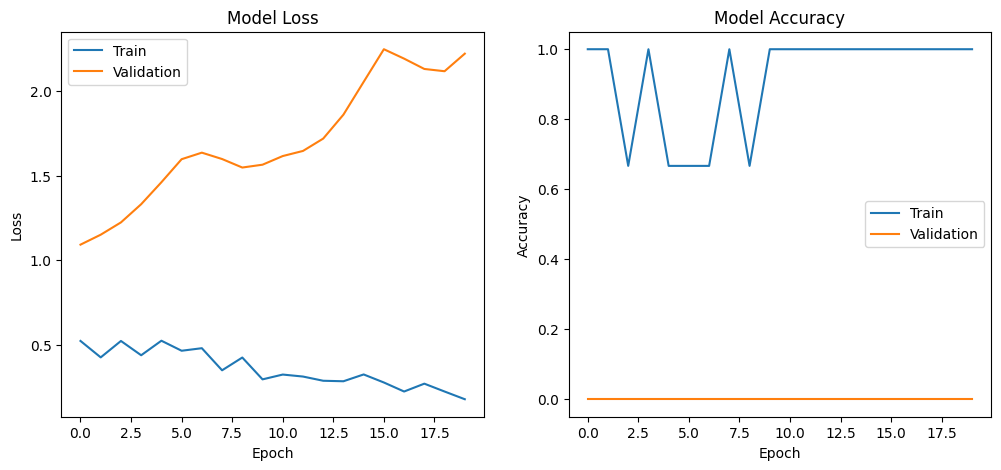

In [ ]:
import matplotlib.pyplot as plt

# Assuming history is the result of model.fit()
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()


## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨**Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)**🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.